<a href="https://colab.research.google.com/github/ella13162/DataScience/blob/main/Week_8_SeminarPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, pearsonr, norm

from sklearn.linear_model import LinearRegression                   # Build a Linear Regression ML model
from sklearn.model_selection import train_test_split                # Split a dataset in a train and test set
from sklearn.metrics import mean_squared_error, mean_absolute_error # Calculating errors

import warnings
warnings.filterwarnings('ignore')                                   # ignore any warnings

In [ ]:
from google.colab import files

file = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float64
 1

In [ ]:
columns_to_drop = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']
df = df.drop(columns=columns_to_drop)

In [ ]:
missing_values = df.isna().sum()

In [ ]:
df = df.dropna()

Histogram

Text(0.5, 1.0, 'Histogram of Price')

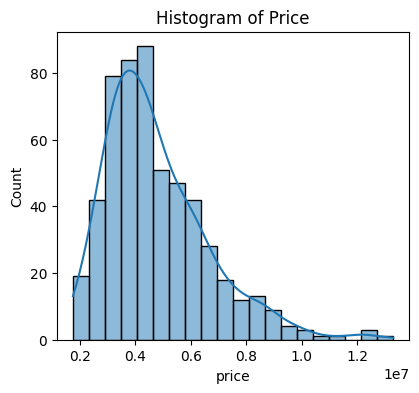

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Histogram of Price')

Bar chart

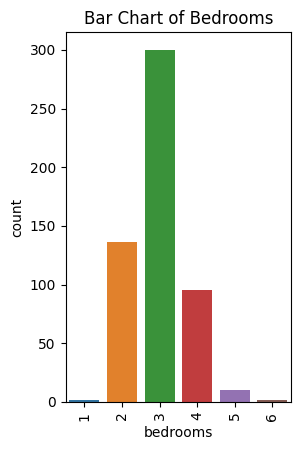

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='bedrooms')
plt.title('Bar Chart of Bedrooms')
plt.xticks(rotation=90)
plt.show()

Skatter Plot

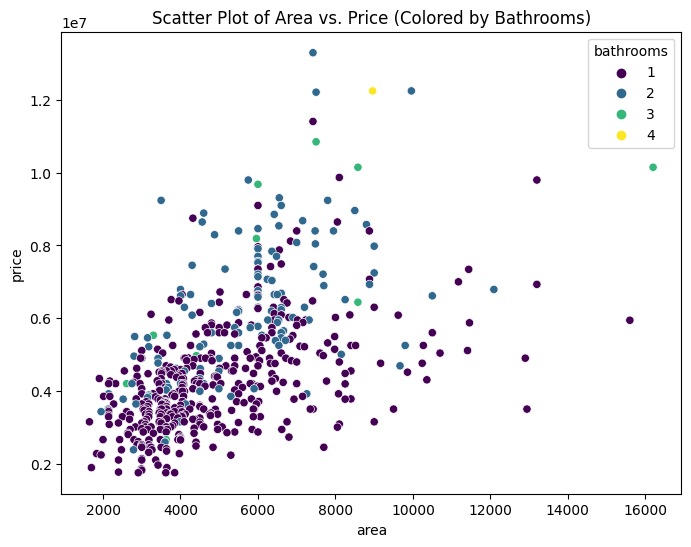

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='price', hue='bathrooms', palette='viridis')
plt.title('Scatter Plot of Area vs. Price (Colored by Bathrooms)')
plt.show()

Skewness

In [ ]:
price_skew = skew(df['price'])
print(f'Skewness of Price: {price_skew}')

Skewness of Price: 1.2088998457878217


Pearson Correlation Matrix

In [ ]:
corr = df.corr(method='pearson')
print(f'Pearson Correlation Matrix:\n{corr}')

Pearson Correlation Matrix:
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


Normal Distribution

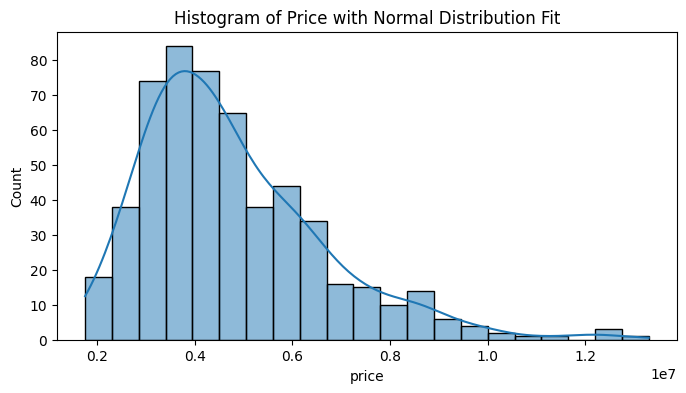

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Histogram of Price with Normal Distribution Fit')
plt.show()

Gaussian Distribution

In [ ]:
mean, std = norm.fit(df['price'])
print(f'Estimated Mean: {mean}, Estimated Std Deviation: {std}')

Estimated Mean: 4766729.247706422, Estimated Std Deviation: 1868722.8281312082


(array([6.03677668e-08, 1.33444537e-07, 2.51002820e-07, 2.66889074e-07,
        2.79598078e-07, 1.62039795e-07, 1.49330792e-07, 1.33444537e-07,
        8.89630247e-08, 5.71905159e-08, 3.81270106e-08, 4.13042615e-08,
        2.85952580e-08, 1.27090035e-08, 9.53175265e-09, 3.17725088e-09,
        3.17725088e-09, 0.00000000e+00, 9.53175265e-09, 3.17725088e-09]),
 array([ 1750000.,  2327500.,  2905000.,  3482500.,  4060000.,  4637500.,
         5215000.,  5792500.,  6370000.,  6947500.,  7525000.,  8102500.,
         8680000.,  9257500.,  9835000., 10412500., 10990000., 11567500.,
        12145000., 12722500., 13300000.]),
 <BarContainer object of 20 artists>)

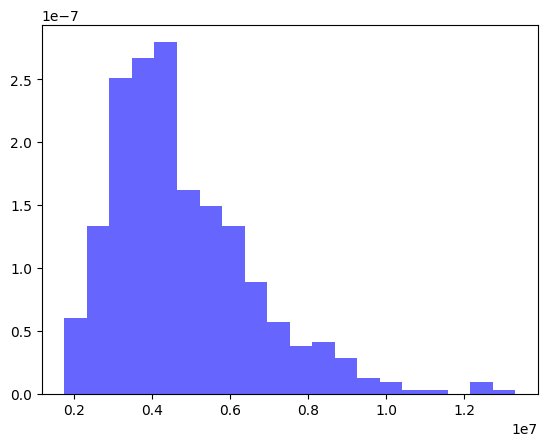

In [ ]:
plt.hist(df['price'], bins=20, density=True, alpha=0.6, color='b', label='Data')

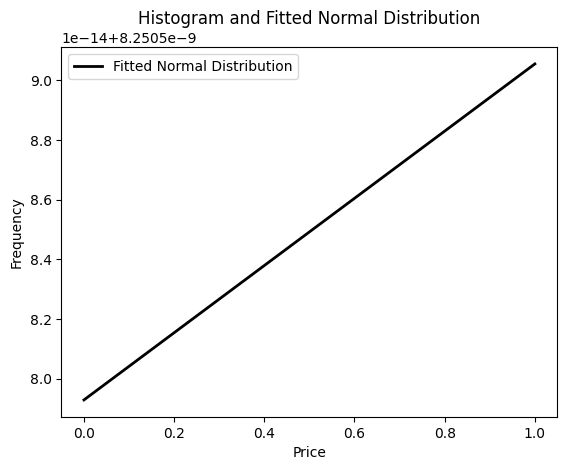

In [ ]:
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.title('Histogram and Fitted Normal Distribution')
plt.show()

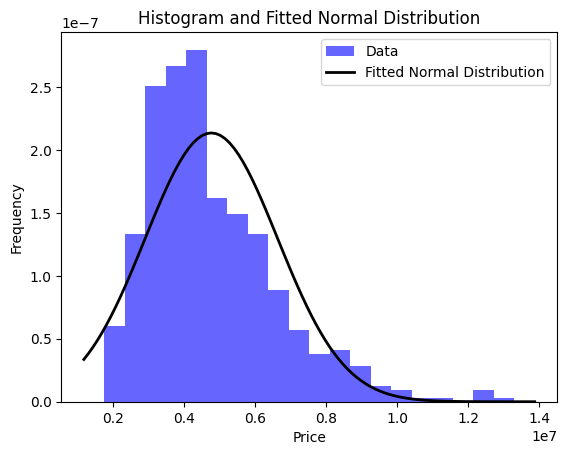

In [ ]:
plt.hist(df['price'], bins=20, density=True, alpha=0.6, color='b', label='Data')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.title('Histogram and Fitted Normal Distribution')
plt.show()

Linear Regression

In [ ]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

reg = LinearRegression().fit(X, y)
print(f'Linear Regression Coefficients: {reg.coef_}')
print(f'Linear Regression Intercept: {reg.intercept_}')

Linear Regression Coefficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Linear Regression Intercept: -173171.6076326361


Linear Regression, Prediction and Scatter Plot

In [ ]:
X = df[['bedrooms', 'bathrooms', 'area']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = LinearRegression()
reg.fit(X_train, y_train)


y_pred = reg.predict(X_test)

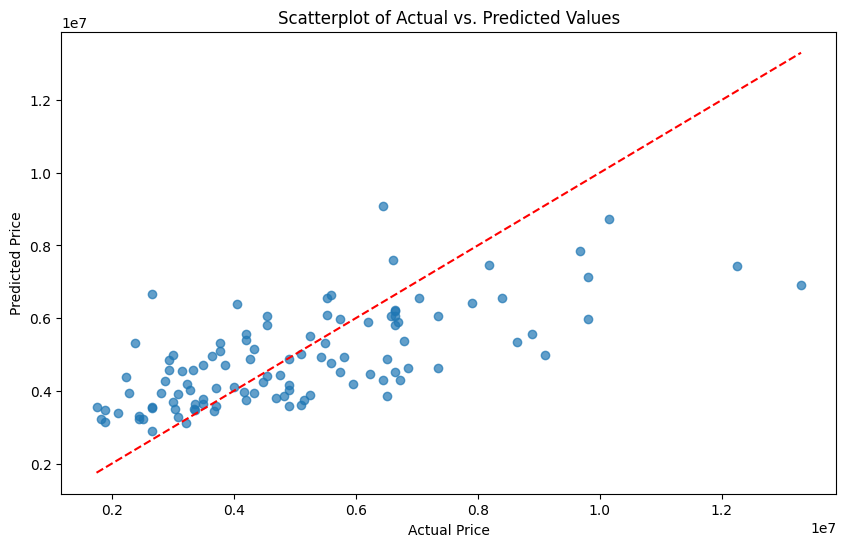

In [ ]:
#Scatterplot with Regression Line

plt.figure(figsize=(10, 6))

# Scatterplot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Scatterplot of Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

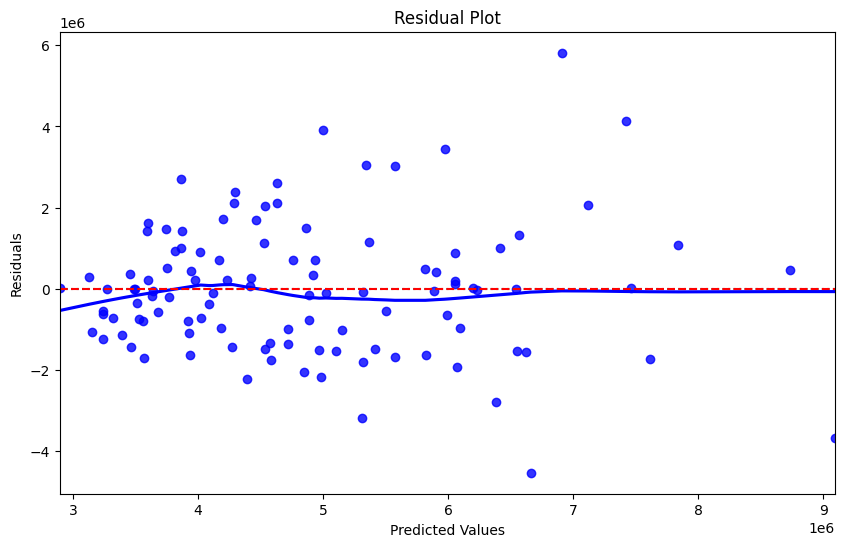

In [ ]:
#Residual Plot

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))


sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()